In [1]:
import numpy as np
import pandas as pd

In [66]:
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('mushrooms.csv')

In [3]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [10]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [5]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [8]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [12]:
X=data.drop('class',axis=1)
y=data['class']
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [20]:
Encoder_X = LabelEncoder() 
for col in X.columns:
    X[col] = Encoder_X.fit_transform(X[col])
Encoder_y=LabelEncoder()
y = Encoder_y.fit_transform(y)

In [14]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [26]:
X = pd.get_dummies(X)

In [27]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


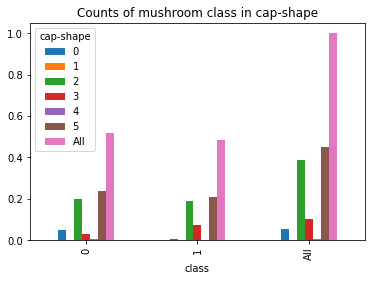

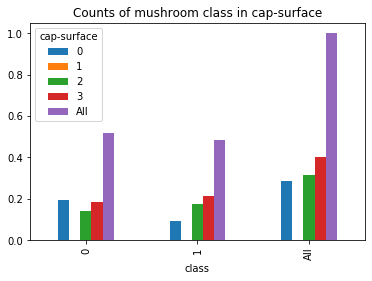

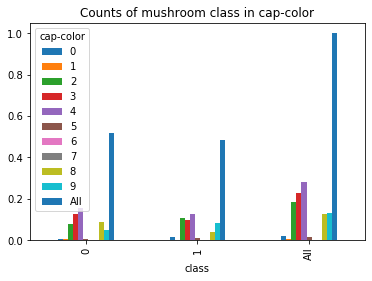

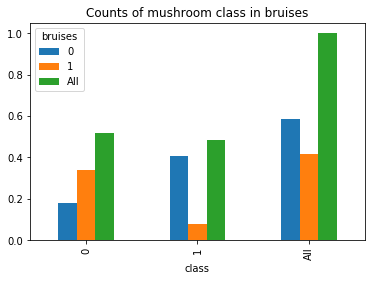

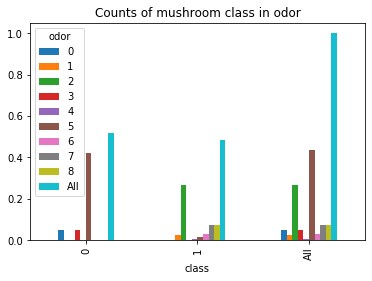

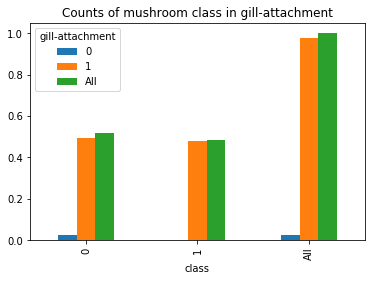

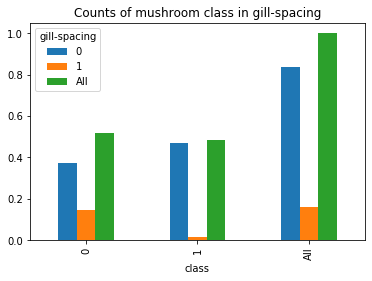

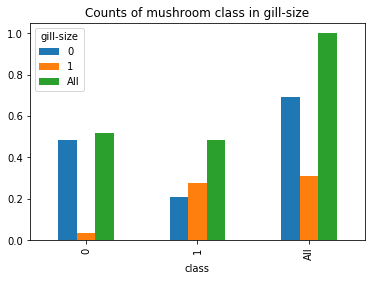

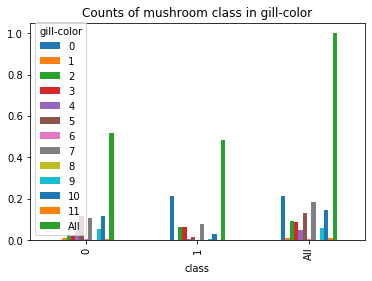

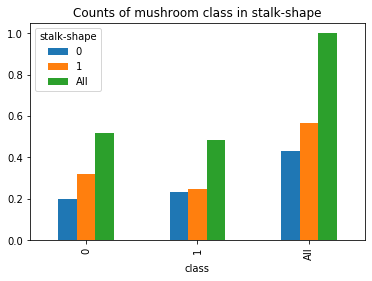

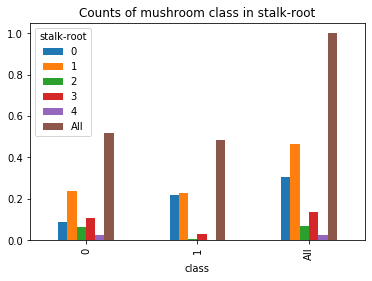

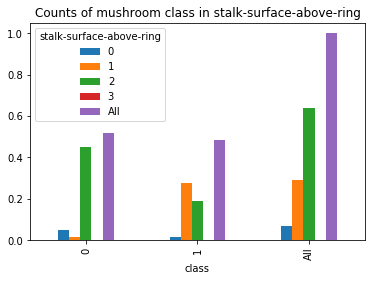

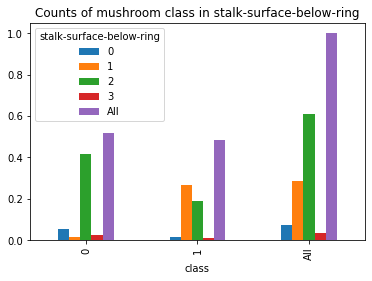

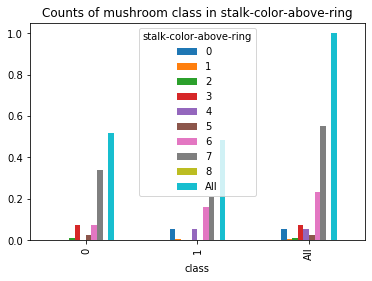

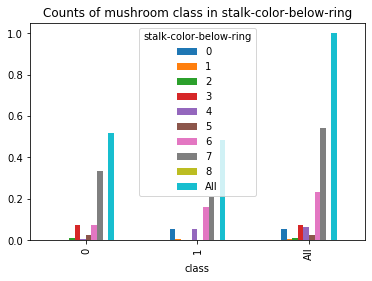

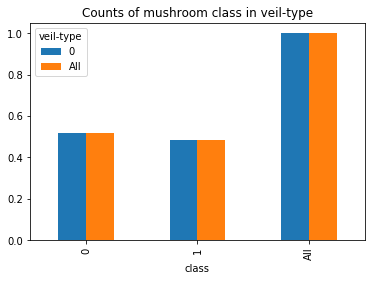

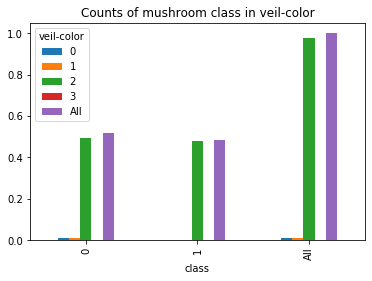

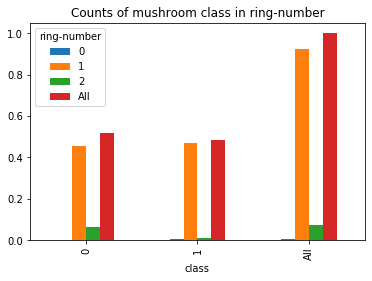

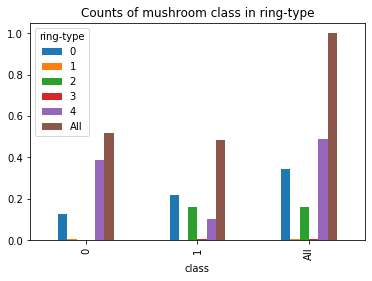

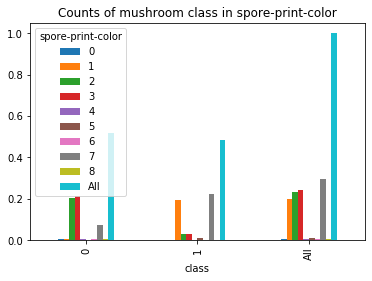

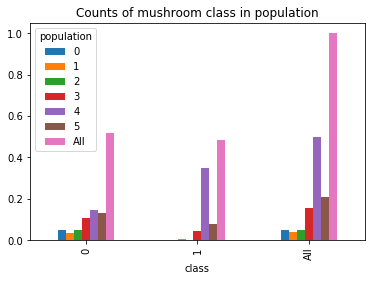

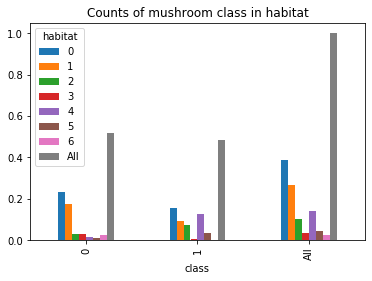

In [70]:
for col in data.columns[1:]:
    pd.crosstab(data['class'], data[col], margins=True, normalize=True).plot(kind='bar', title = 'Counts of mushroom class in '+col)

In [71]:
for col in data.columns[1:]:
    df_c = pd.crosstab(data['class'], data[col], normalize=True)
    style = df_c.style.background_gradient(cmap='Blues')
    display(style)

cap-shape,0,1,2,3,4,5
class,,,,,,
0,0.0497292,0,0.196455,0.028065,0.00393895,0.239783
1,0.00590842,0.000492368,0.191531,0.0738552,0,0.210241


cap-surface,0,1,2,3
class,,,,
0,0.192024,0,0.140817,0.18513
1,0.09355,0.000492368,0.173806,0.21418


cap-color,0,1,2,3,4,5,6,7,8,9
class,,,,,,,,,,
0,0.00590842,0.00393895,0.0768095,0.127031,0.155588,0.00689316,0.00196947,0.00196947,0.0886263,0.0492368
1,0.014771,0.0014771,0.107829,0.0994584,0.125554,0.0108321,0,0,0.0393895,0.0827179


bruises,0,1
class,,
0,0.179222,0.338749
1,0.405219,0.0768095


odor,0,1,2,3,4,5,6,7,8
class,,,,,,,,,
0,0.0492368,0,0,0.0492368,0,0.419498,0,0,0
1,0,0.0236337,0.265879,0,0.00443131,0.014771,0.0315116,0.070901,0.070901


gill-attachment,0,1
class,,
0,0.0236337,0.494338
1,0.00221566,0.479813


gill-spacing,0,1
class,,
0,0.370261,0.14771
1,0.468242,0.0137863


gill-size,0,1
class,,
0,0.482521,0.0354505
1,0.208272,0.273757


gill-color,0,1,2,3,4,5,6,7,8,9,10,11
class,,,,,,,,,,,,
0,0,0.0118168,0.0305268,0.0251108,0.0423437,0.115214,0.00787789,0.104874,0,0.0546529,0.117676,0.00787789
1,0.212703,0,0.0620384,0.0649926,0.00787789,0.0137863,0,0.0787789,0.00295421,0.00590842,0.0302806,0.00270803


stalk-shape,0,1
class,,
0,0.198917,0.319055
1,0.233875,0.248154


stalk-root,0,1,2,3,4
class,,,,,
0,0.0886263,0.236337,0.0630231,0.106352,0.0236337
1,0.216642,0.228459,0.00541605,0.0315116,0


stalk-surface-above-ring,0,1,2,3
class,,,,
0,0.0502216,0.0177253,0.448055,0.00196947
1,0.0177253,0.274249,0.189069,0.000984737


stalk-surface-below-ring,0,1,2,3
class,,,,
0,0.05613,0.0177253,0.418513,0.0256032
1,0.0177253,0.265879,0.189069,0.009355


stalk-color-above-ring,0,1,2,3,4,5,6,7,8
class,,,,,,,,,
0,0,0,0.0118168,0.070901,0.00196947,0.0236337,0.070901,0.338749,0
1,0.0531758,0.00443131,0,0,0.0531758,0,0.159527,0.210734,0.000984737


stalk-color-below-ring,0,1,2,3,4,5,6,7,8
class,,,,,,,,,
0,0,0,0.0118168,0.070901,0.00787789,0.0236337,0.070901,0.332841,0
1,0.0531758,0.00443131,0,0,0.0551452,0,0.159527,0.206795,0.00295421


veil-type,0
class,
0,0.517971
1,0.482029


veil-color,0,1,2,3
class,,,,
0,0.0118168,0.0118168,0.494338,0
1,0,0,0.481044,0.000984737


ring-number,0,1,2
class,,,
0,0,0.452979,0.0649926
1,0.00443131,0.468735,0.00886263


ring-type,0,1,2,3,4
class,,,,,
0,0.124077,0.00590842,0,0,0.387986
1,0.217627,0,0.159527,0.00443131,0.100443


spore-print-color,0,1,2,3,4,5,6,7,8
class,,,,,,,,,
0,0.00590842,0.00590842,0.202856,0.214673,0.00590842,0,0.00590842,0.070901,0.00590842
1,0,0.194978,0.0275726,0.0275726,0,0.00886263,0,0.223043,0


population,0,1,2,3,4,5
class,,,,,,
0,0.0472674,0.0354505,0.0492368,0.108321,0.146726,0.13097
1,0,0.00640079,0,0.0452979,0.350566,0.0797637


habitat,0,1,2,3,4,5,6
class,,,,,,,
0,0.231413,0.173314,0.0295421,0.0315116,0.0167405,0.0118168,0.0236337
1,0.156081,0.0910881,0.0728705,0.00443131,0.124077,0.033481,0


In [37]:
kmeans = KMeans(n_clusters=2)

In [38]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [62]:
data.corr()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.298801,-0.154003,-0.146730,NaN,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.032591,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.107965,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.047710,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.458983,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.061820,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.116177,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.213775,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.010894,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.257224,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


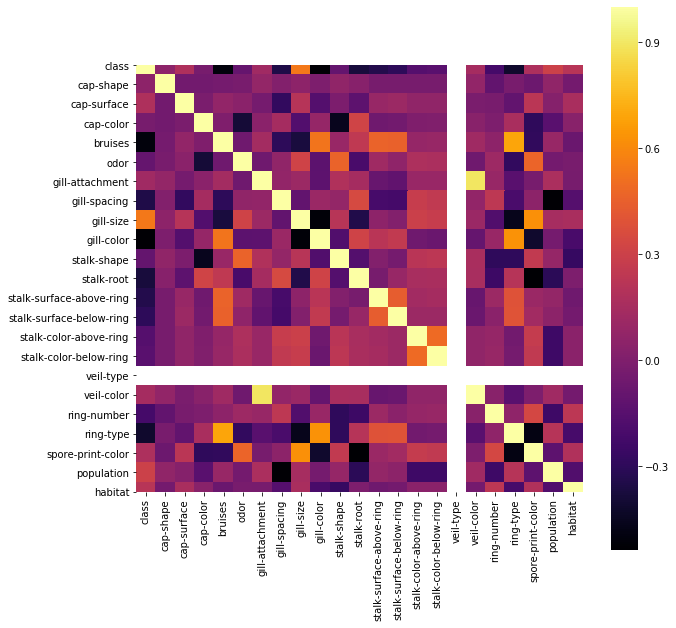

In [63]:
import seaborn as sns
plt.figure(figsize = (10,10))
sns.heatmap(data.corr(), cmap = 'inferno',square=True)